In [78]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [42]:
df = pd.read_csv("/home/nodlehs/Downloads/creditcard.csv")
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0
df = df.rename(columns={'Class': 'Fraud'})
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [43]:
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


In [44]:
X_train = Fraud[::2]
count_Frauds = len(X_train)

X_train = pd.concat([X_train, Normal.sample(n = 50000)], axis = 0)

X_test = df.loc[~df.index.isin(X_train.index)]

X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [45]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [46]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50246
50246
234561
234561


In [47]:
'''
ratio will act as an equal weighting system for our model. Because we want to reduce the mean squared error between
our predicted and target values, we want the initial sums of our labels to be equal. ratio will multiply the Fraud 
values so that they equal the sum of the Normal values (each Normal value equals 1).
'''
ratio = len(X_train)/count_Frauds 

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [48]:
features = X_train.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std


In [49]:
inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_test = X_test.as_matrix()
inputY_test = y_test.as_matrix()

In [63]:
mulitplier = 1.5 


hidden_nodes1 = 15
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

In [64]:
x = tf.placeholder(tf.float32, [None, 30]) #there are 30 inputs

#layer 1
W1 = tf.Variable(tf.zeros([30, hidden_nodes1]))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

#layer 2
W2 = tf.Variable(tf.zeros([hidden_nodes1, hidden_nodes2]))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

#layer 3
W3 = tf.Variable(tf.zeros([hidden_nodes2, hidden_nodes3])) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)

#layer 4
W4 = tf.Variable(tf.zeros([hidden_nodes3, 2])) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

#output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])


In [69]:
learning_rate = 0.0005
training_epochs = 30000
display_step = 100
n_samples = y_train.size

In [70]:
cost = tf.reduce_mean(tf.square(y_ - y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [71]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [72]:
accuracy_summary = []
cost_summary = [] 

for i in range(training_epochs):  
    sess.run([optimizer], feed_dict={x: inputX, y_: inputY})
    
    
    if (i) % display_step == 0:
        train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, y_: inputY})
        print ("Training step:", i,
               "Accuracy =", "{:.5f}".format(train_accuracy), 
               "Cost = ", "{:.5f}".format(newCost))
        accuracy_summary.append(train_accuracy)
        cost_summary.append(newCost)
        
print()
print ("Optimization Finished!")
training_accuracy = sess.run(accuracy, feed_dict={x: inputX, y_: inputY})
print ("Training Accuracy=", training_accuracy)
print()
testing_accuracy = sess.run(accuracy, feed_dict={x: inputX_test, y_: inputY_test})
print ("Testing Accuracy=", testing_accuracy)


Training step: 0 Accuracy = 0.00490 Cost =  101.89774
Training step: 100 Accuracy = 0.00490 Cost =  101.89889
Training step: 200 Accuracy = 0.00490 Cost =  101.80441
Training step: 300 Accuracy = 0.02076 Cost =  101.62411
Training step: 400 Accuracy = 0.84837 Cost =  101.49538
Training step: 500 Accuracy = 0.93170 Cost =  101.42694
Training step: 600 Accuracy = 0.94883 Cost =  101.38492
Training step: 700 Accuracy = 0.95767 Cost =  101.32066
Training step: 800 Accuracy = 0.96199 Cost =  101.28936
Training step: 900 Accuracy = 0.96531 Cost =  101.26963
Training step: 1000 Accuracy = 0.96913 Cost =  101.25553
Training step: 1100 Accuracy = 0.97178 Cost =  101.23685
Training step: 1200 Accuracy = 0.97401 Cost =  101.22544
Training step: 1300 Accuracy = 0.97502 Cost =  101.21721
Training step: 1400 Accuracy = 0.97654 Cost =  101.21067
Training step: 1500 Accuracy = 0.97787 Cost =  101.20540
Training step: 1600 Accuracy = 0.97912 Cost =  101.20078
Training step: 1700 Accuracy = 0.97974 Cost

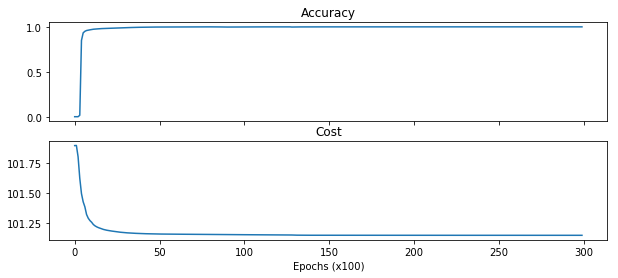

In [73]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary)
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x100)')
plt.show()

In [82]:
predicted = tf.argmax(y, 1)
testing_accuracy, testing_predictions = sess.run([accuracy,predicted], feed_dict={x: inputX_test, y_: inputY_test })
print(testing_accuracy)
print(confusion_matrix(y_test.Normal, testing_predictions))
print("RECALL SCORE",recall_score(y_test.Normal,testing_predictions))
print("PRECISION SCORE", precision_score(y_test.Normal,testing_predictions))

0.996994
[[   204     42]
 [   663 233652]]
RECALL SCORE 0.997170475642
PRECISION SCORE 0.999820277799


,Fraud,Normal
151991,0.0,1.0
92317,0.0,1.0
238936,0.0,1.0
184752,0.0,1.0
117160,0.0,1.0
246800,0.0,1.0
275474,0.0,1.0
138690,0.0,1.0
16327,0.0,1.0
197300,0.0,1.0
